In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [89]:
df1=pd.read_csv("2011.csv")

In [90]:
df = pd.DataFrame(columns=['Year','Month','Day','Hour','DewPoint','Temperature','Pressure','RelativeHumidity','WindDirection','WindSpeed','Radiation'])

In [91]:
#df.loc[0]=df1.iloc[0]

In [92]:
df1.shape

(8760, 11)

In [120]:
import tensorflow as tf

In [93]:
#df.loc[0]=df1.iloc[0].tolist()

In [94]:
df1.shape

(8760, 11)

In [95]:
df1.head()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0


In [96]:
df1.columns=['Year','Month','Day','Hour','DewPoint','Temperature','Pressure','RelativeHumidity','WindDirection','WindSpeed','Radiation']

In [97]:
df1.head()

,Year,Month,Day,Hour,DewPoint,Temperature,Pressure,RelativeHumidity,WindDirection,WindSpeed,Radiation
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0


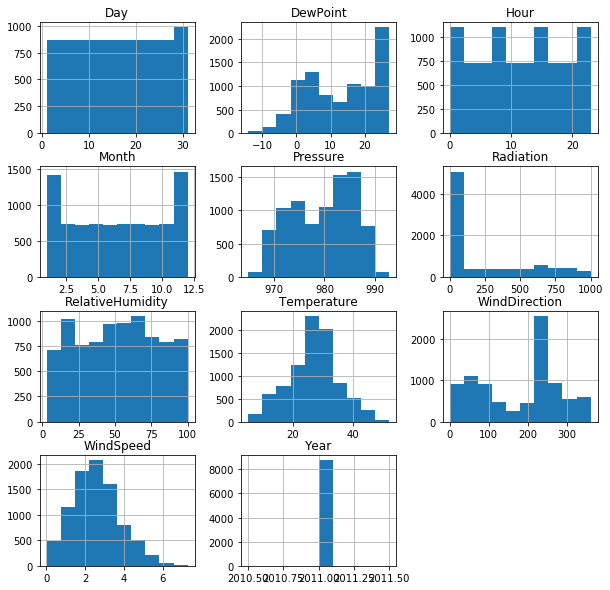

In [98]:
df1.hist(figsize=(10,10))
plt.show()

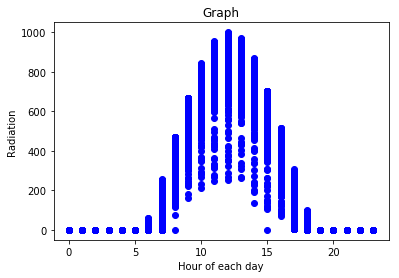

In [99]:
plt.scatter(df1.Hour,df1.Radiation,color='blue')
plt.xlabel("Hour of each day")
plt.ylabel("Radiation")
plt.title("Graph")
plt.show()

In [100]:
i=0
k=0
while k<=8758:
    if(df1.iloc[i].Hour<6 or df1.iloc[i].Hour>19):
        df1=df1.drop(df1.index[i])
        i=i-1
    i=i+1
    k=k+1

In [101]:
df1.head()

,Year,Month,Day,Hour,DewPoint,Temperature,Pressure,RelativeHumidity,WindDirection,WindSpeed,Radiation
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363
10,2011,1,1,10,3,18.956082,988.054504,36.747087,72.488327,0.545695,533


In [102]:
df1=df1.drop(['Year'],axis=1)

In [103]:
df1.head()

,Month,Day,Hour,DewPoint,Temperature,Pressure,RelativeHumidity,WindDirection,WindSpeed,Radiation
6,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363
10,1,1,10,3,18.956082,988.054504,36.747087,72.488327,0.545695,533


In [104]:
from sklearn.model_selection import train_test_split
X=df1[['Temperature', 'Pressure', 'RelativeHumidity', 'WindSpeed',
     'Day', 'Hour', 'Month',
       'WindDirection','DewPoint']]


Y=df1.Radiation

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state= 0)

def model_score_error(model):
    prepared_model=model.fit(X_train, Y_train)
    x=prepared_model.score(X_test,Y_test)
    print('Score: ',x)
    Target_predicted=prepared_model.predict(X_test) 

In [105]:
from sklearn.neural_network import MLPRegressor

In [106]:
df1.shape

(5111, 10)

In [107]:
linreg= LinearRegression().fit(X_train, Y_train) 
print("Score: ",linreg.score(X,Y))
Target_predicted= linreg.predict(X_test) 

Score:  0.494839367496


In [108]:
sub = pd.DataFrame()
sub = sub.reset_index()
sub['Radiation'] = Target_predicted
sub.to_csv('submission.csv',index=False)

In [113]:
MLP = MLPRegressor(activation='relu', alpha=10, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

model_score_error(MLP)

Score:  0.461988061662
